In [5]:
import numpy as np
from matplotlib import pyplot as plt

1.1 Pillow: Read images 

In [3]:
from PIL import Image
img = Image.open('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg')
print(type(img)) # note: images open by pillow is not numpy array 
# img.show()
print(img.format)
print(img.mode) #RGB
print(img.size)

img_np = np.asarray(img) # convert to numpy array
print(type(img_np))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1646, 1176)
<class 'numpy.ndarray'>


1.2 Pillow: Basic Image Processing

In [4]:
### Resize ###
small_img = img.resize((300, 400))
small_img.save('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/small_cat.jpg')
img.thumbnail((300, 400))
img.save('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/thumbnail_cat.jpg') #preserve the ratio

### Crop ###
cropped_img = img.crop((0, 0, 300, 300))
cropped_img.save('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cropped_cat.jpg') 

### Rotate ###
img90 = img.rotate(90)
img90.save('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/rotate_cat.jpg') 

### Flip ###
img_flipLR = img.transpose(Image.FLIP_LEFT_RIGHT)
img_flipLR.save('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/flipLR_cat.jpg')

### Grayscale ###
img_gray = img.convert("L")
img_gray.save('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/grey_cat.jpg')

2 Read images using Matplotlib

<class 'numpy.ndarray'>
(1176, 1646, 3)


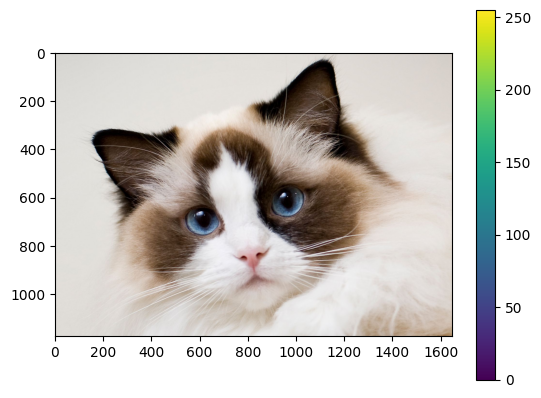

In [5]:
import matplotlib.image as mpimg
img = mpimg.imread('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg')
print(type(img)) # note: this is an numpy array
print(img.shape)
plt.imshow(img)
plt.colorbar()

3 Read images using Scikit-image

In [6]:
from skimage import io, img_as_float, img_as_ubyte
image = io.imread('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg')
print(type(image))
# plt.imshow(image)
image_float = img_as_float(image) #automatically scale everything between 0 and 1
# print(image_float) 

<class 'numpy.ndarray'>


4 Read images using OpenCV ( a library of programming functions for computer vision)

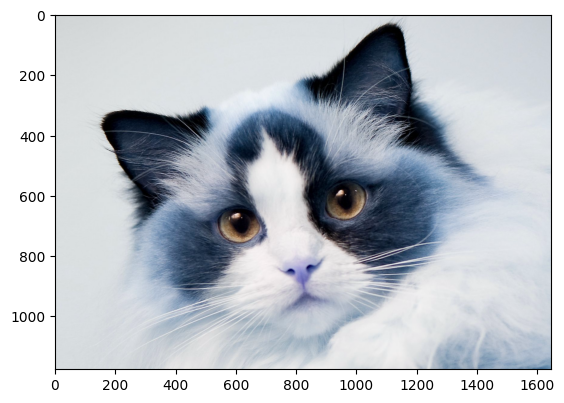

In [7]:
import cv2 #pip install opencv-python
img = cv2.imread('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg', 1) #try putting nothing, 0 or 1
plt.imshow(img) # color are changed, because OpenCV reads images in BGR format by default, while Matplotlib displays in RGB format

In [8]:
cv2.imshow("Original image", img)
cv2.waitKey(1000)
cv2.destroyAllWindows()

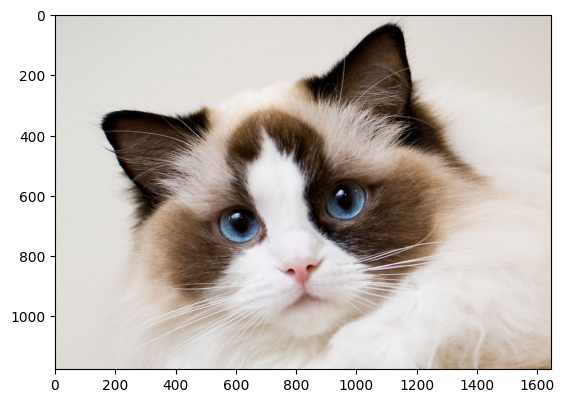

In [9]:
color_img = cv2.imread('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg', 1)
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)) # convert an image from one color space to another

5 Scipy: basic image processing

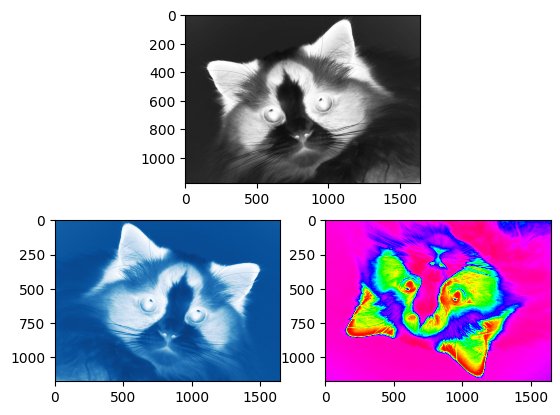

In [11]:
from skimage import io, img_as_ubyte
from scipy import ndimage

img = img_as_ubyte(io.imread('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg', as_gray=True))
flippedLR = np.fliplr(img)
flippedUD = np.flipud(img)

plt.subplot(2, 1, 1)
plt.imshow(img, cmap="Greys")
plt.subplot(2, 2, 3)
plt.imshow(flippedLR,cmap="Blues")
plt.subplot(2, 2, 4)
plt.imshow(flippedUD, cmap="hsv")

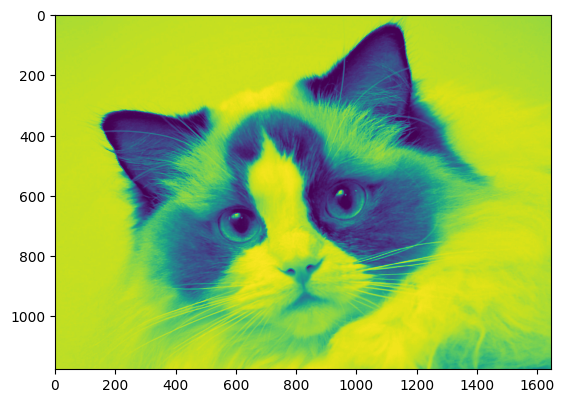

In [12]:
uniform_filtered = ndimage.uniform_filter(img, size=3)
plt.imshow(uniform_filtered)

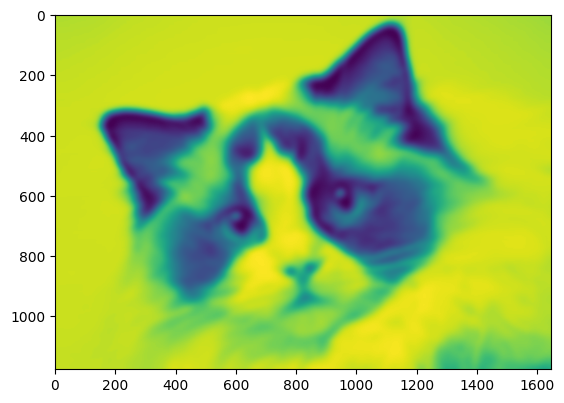

In [13]:
gaussian = ndimage.gaussian_filter(img, sigma=11)
plt.imshow(gaussian)

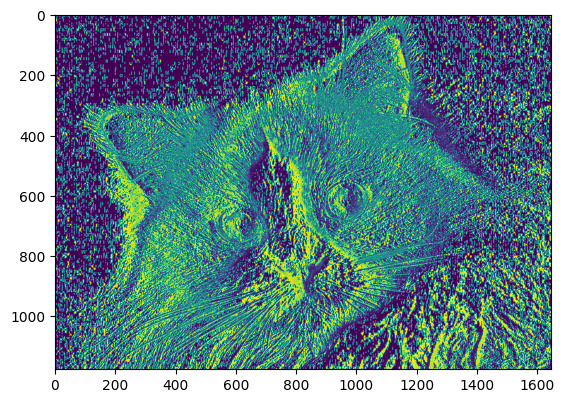

In [18]:
sobel_img = ndimage.sobel(img)
plt.imshow(sobel_img)

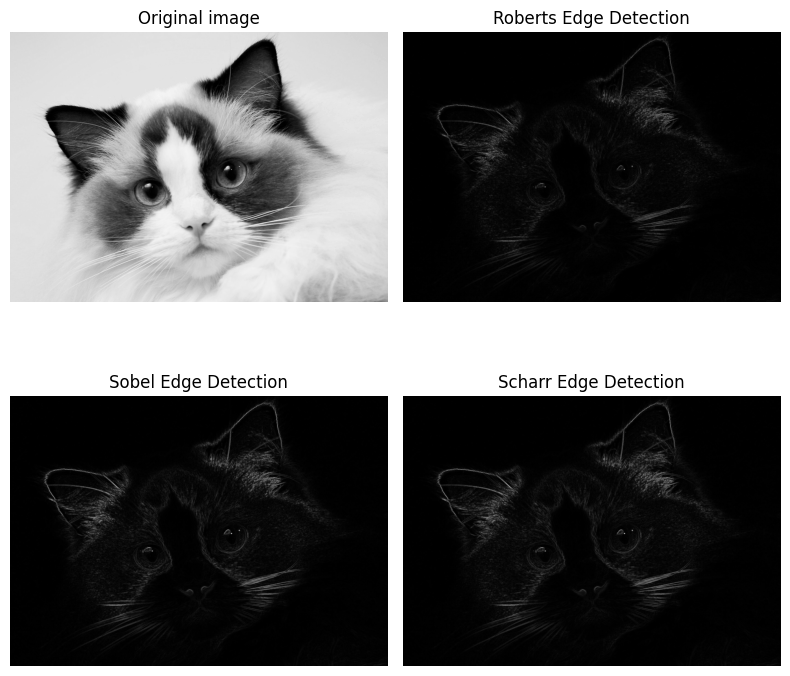

In [26]:
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/cat.jpg', as_gray=True)

edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

# Plotting together
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax = axes.ravel()
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Original image")
ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title("Roberts Edge Detection")
ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title("Sobel Edge Detection")
ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title("Scharr Edge Detection")

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

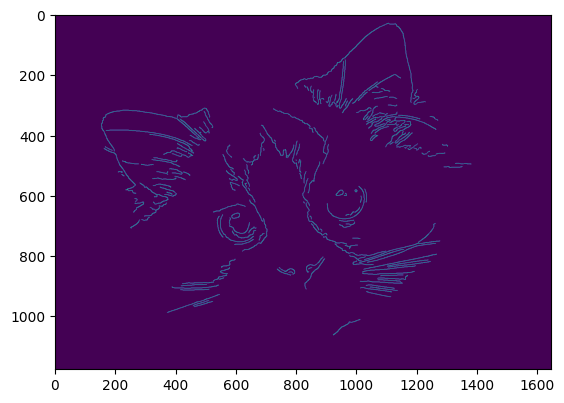

In [31]:
from skimage.feature import canny
edge_canny = canny(img, sigma=3) # try different number here
plt.imshow(edge_canny)

In [37]:
from skimage import restoration

psf = np.ones((3, 3))/9
deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave('/home/yuhanzh/Image_Processing_Tutorial/test_imgs/deconvoled_cat.jpg', deconvolved, cmap='gray')

All images under a subfolder

In [ ]:
import glob

path = "images/.../*"
for file in glob.glob(path):
    a = cv2.imread(file) # file is the image name
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

In [1]:
from PIL import Image

path = "images/.../*"
for file in glob.glob(path):
    a = Image.open(file)
    rotate45 = a.rotate(45, expand=True)
    rotate45.save(file+"_rotated45.png", "PNG")